[Watch Full Video](https://youtu.be/RVC2IP86mXE)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Load CIFAR-10 dataset

[About Dataset](https://www.tensorflow.org/datasets/catalog/cifar10)

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

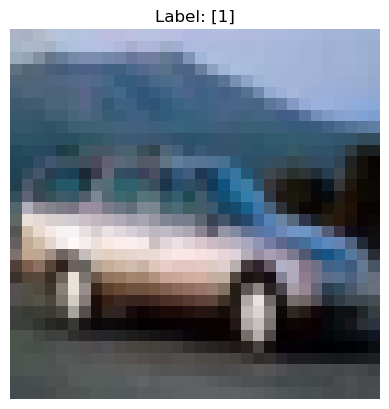

In [5]:
plt.imshow(X_train[4])
plt.title(f"Label: {y_train[4]}")
plt.axis('off')
plt.show()

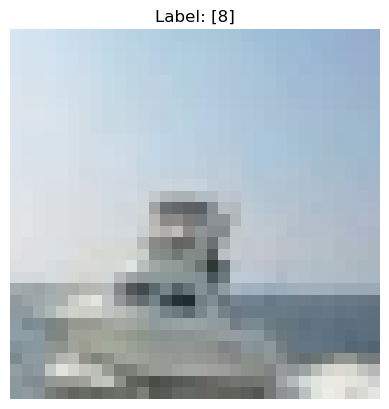

In [6]:
plt.imshow(X_train[100], cmap='gray')
plt.title(f"Label: {y_train[100]}")
plt.axis('off')
plt.show()

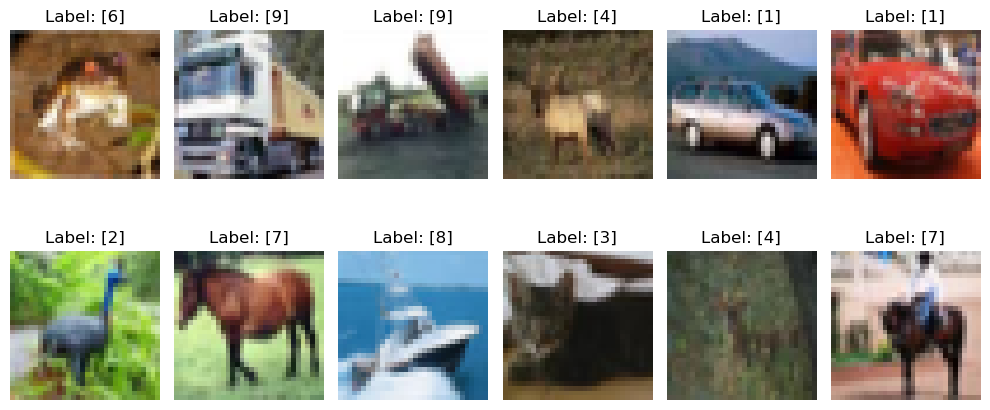

In [7]:
plt.figure(figsize=(10, 5))

for i in range(12):
    plt.subplot(2, 6, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Normalize pixel values to the range [0, 1]

In [8]:
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-dimensional arrays

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [11]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

# Create the model

In [12]:
cnn_model = models.Sequential()

# First Convolutional Block

In [13]:
cnn_model.add(layers.Conv2D(32, (3, 3), 
                            activation='relu', 
                            input_shape=(32, 32, 3)))

cnn_model.add(layers.BatchNormalization()) 
cnn_model.add(layers.MaxPooling2D((2, 2))) #downsampling

# Second Convolutional Block

In [14]:
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Block

In [15]:
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.BatchNormalization())

# Fully Connected Layers

In [16]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax')) 

# Print model summary

In [17]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                        

# Compile the Model

In [18]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [19]:
history = cnn_model.fit(X_train, y_train, 
                        epochs=10, 
                        batch_size=64, 
                        validation_split=0.2, 
                        verbose=2)

Epoch 1/10
625/625 - 22s - loss: 1.6542 - accuracy: 0.4475 - val_loss: 1.2866 - val_accuracy: 0.5338 - 22s/epoch - 35ms/step
Epoch 2/10
625/625 - 19s - loss: 1.1636 - accuracy: 0.5930 - val_loss: 1.3161 - val_accuracy: 0.5445 - 19s/epoch - 31ms/step
Epoch 3/10
625/625 - 19s - loss: 0.9980 - accuracy: 0.6514 - val_loss: 1.0118 - val_accuracy: 0.6443 - 19s/epoch - 30ms/step
Epoch 4/10
625/625 - 19s - loss: 0.8833 - accuracy: 0.6894 - val_loss: 1.0874 - val_accuracy: 0.6298 - 19s/epoch - 30ms/step
Epoch 5/10
625/625 - 19s - loss: 0.8029 - accuracy: 0.7197 - val_loss: 1.2869 - val_accuracy: 0.5739 - 19s/epoch - 30ms/step
Epoch 6/10
625/625 - 18s - loss: 0.7291 - accuracy: 0.7432 - val_loss: 1.4114 - val_accuracy: 0.5794 - 18s/epoch - 29ms/step
Epoch 7/10
625/625 - 18s - loss: 0.6677 - accuracy: 0.7648 - val_loss: 0.9767 - val_accuracy: 0.6744 - 18s/epoch - 29ms/step
Epoch 8/10
625/625 - 21s - loss: 0.6104 - accuracy: 0.7857 - val_loss: 0.8958 - val_accuracy: 0.6977 - 21s/epoch - 33ms/step


# Evaluate on test data

In [20]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 - 2s - loss: 0.9786 - accuracy: 0.6889 - 2s/epoch - 6ms/step
Test Accuracy: 0.69


In [21]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

1/1 [==============================] - 0s 91ms/step


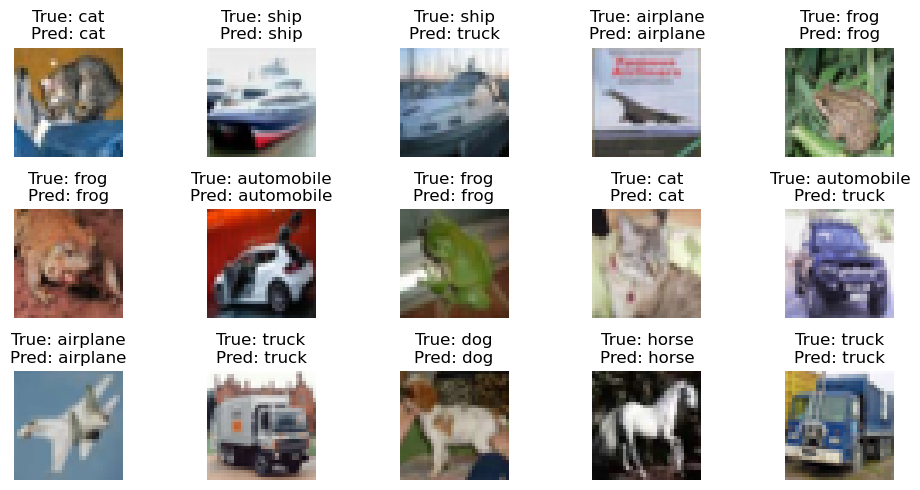

In [22]:
sample_images = X_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(cnn_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot accuracy and loss

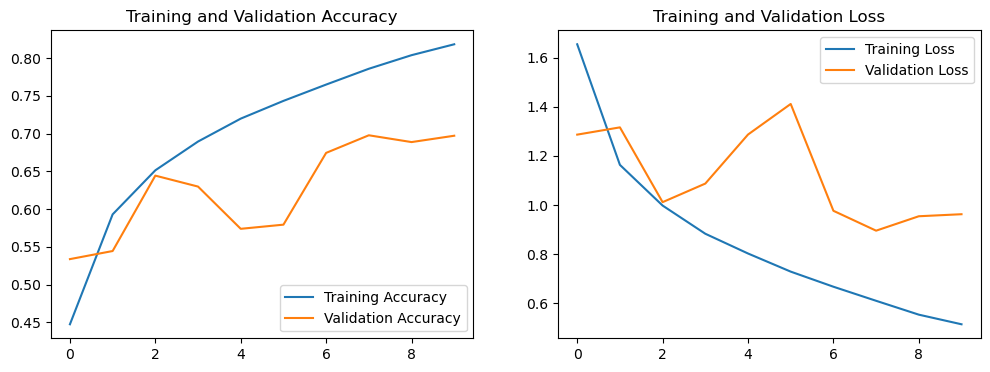

In [23]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

313/313 [==============================] - 2s 6ms/step


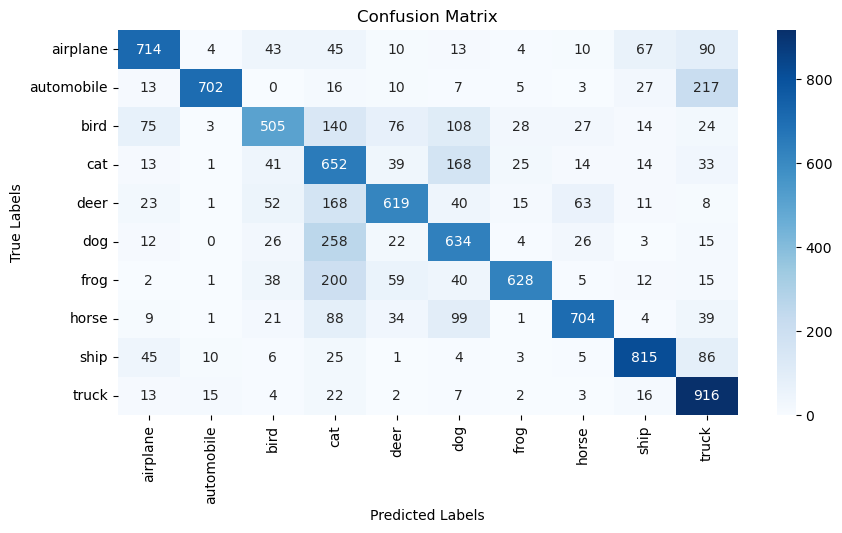

In [24]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report

In [25]:
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.78      0.71      0.74      1000
  automobile       0.95      0.70      0.81      1000
        bird       0.69      0.51      0.58      1000
         cat       0.40      0.65      0.50      1000
        deer       0.71      0.62      0.66      1000
         dog       0.57      0.63      0.60      1000
        frog       0.88      0.63      0.73      1000
       horse       0.82      0.70      0.76      1000
        ship       0.83      0.81      0.82      1000
       truck       0.63      0.92      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.73      0.69      0.70     10000
weighted avg       0.73      0.69      0.70     10000



# Save the Model

In [26]:
cnn_model.save('cnn_cifar10_model.h5')
print("Model saved as 'cnn_cifar10_model.h5'")

Model saved as 'cnn_cifar10_model.h5'


# Load and Use the Model

1/1 [==============================] - 0s 72ms/step


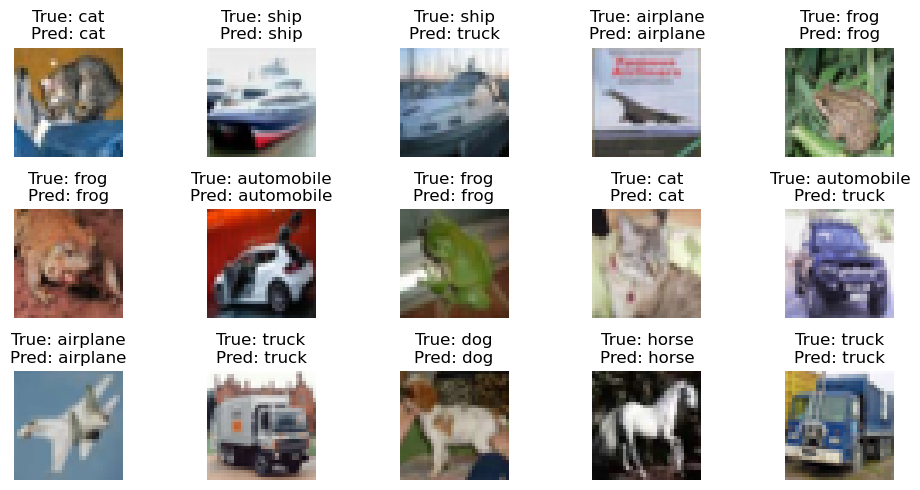

In [27]:
loaded_model = tf.keras.models.load_model('cnn_cifar10_model.h5')

sample_images = X_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(loaded_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()